In [1]:
using AutoRisk
using AutoViz
using Interact
using NGSIM
using Records
using Reel
Reel.set_output_type("gif");

In [2]:
# add three vehicles and specifically check neighbor features
num_veh = 1
# one lane roadway
roadway = NGSIM.ROADWAY_101
scene = Scene(num_veh)

models = Dict{Int, DriverModel}()

# 1: first vehicle, moving the fastest
mlon = StaticLaneFollowingDriver(2.)
models[1] = Tim2DDriver(.1, mlon = mlon)
road_idx = RoadIndex(proj(VecSE2(0.0, 0.0, 0.0), roadway))
base_speed = 2.
veh_state = VehicleState(Frenet(road_idx, roadway), roadway, base_speed)
veh_def = VehicleDef(AgentClass.CAR, 5., 2.)
push!(scene, Vehicle(veh_state, veh_def, 1))

# # 2: second vehicle, in the middle, moving at intermediate speed
# mlon = StaticLaneFollowingDriver(1.)
# models[2] = Tim2DDriver(.1, mlon = mlon)
# base_speed = 1.
# road_pos = 10.
# veh_state = VehicleState(Frenet(road_idx, roadway), roadway, base_speed)
# veh_state = move_along(veh_state, roadway, road_pos)
# veh_def = VehicleDef(AgentClass.CAR, 5., 2.)
# push!(scene, Vehicle(veh_state, veh_def, 2))

rec = SceneRecord(50, .1, num_veh)
simulate!(Any, rec, scene, ROADWAY_101, models, 5., update_first_scene = false)

SceneRecord(nscenes=50)

Interact.Options{:SelectionSlider,Any}(1: "input" = 25 Any , "i", 25, "25", 26, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("0"=>0,"1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9…), Dict{Any,Any}(Pair{Any,Any}(2, "2"),Pair{Any,Any}(11, "11"),Pair{Any,Any}(39, "39"),Pair{Any,Any}(46, "46"),Pair{Any,Any}(25, "25"),Pair{Any,Any}(42, "42"),Pair{Any,Any}(29, "29"),Pair{Any,Any}(8, "8"),Pair{Any,Any}(20, "20"),Pair{Any,Any}(14, "14")…)), Any[], Any[], true, "horizontal")

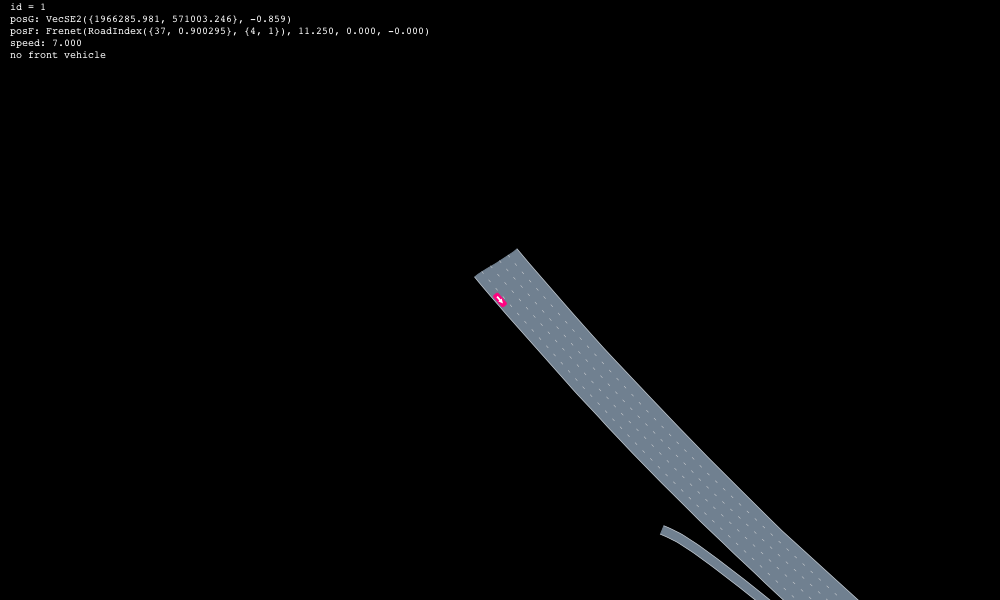

In [3]:
@manipulate for i in 0:nframes(rec)
    stats = [
        CarFollowingStatsOverlay(1, 2), 
        NeighborsOverlay(1, textparams = TextParams(x = 600, y_start=300))
    ]
    render(get!(scene, rec, -i), ROADWAY_101, stats)
end

In [4]:
function Base.length(x::Records.QueueRecord{Records.Entity{AutomotiveDrivingModels.VehicleState,AutomotiveDrivingModels.VehicleDef,Int64}})
    return nframes(x)
end

In [5]:
td = convert(Trajdata, rec)

Trajdata(50 frames)

In [6]:
outpath = "/Users/wulfebw/.julia/v0.6/NGSIM/data/1_simple.txt"
open(io->write(io, MIME"text/plain"(), td), outpath, "w")